## Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Reading the train and test datasets

In [2]:
train =pd.read_csv('/content/drive/MyDrive/Property_train.csv')

In [3]:
test = pd.read_csv('/content/drive/MyDrive/Property_test_share.csv')

In [ ]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,...,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,...,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,...,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,...,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,...,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0


## Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62035 entries, 0 to 62034
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Junk                   62035 non-null  int64 
 1   InteriorsStyle         62035 non-null  object
 2   PriceIndex8            62035 non-null  object
 3   ListDate               62035 non-null  object
 4   Material               62035 non-null  object
 5   PriceIndex9            62035 non-null  int64 
 6   Agency                 62035 non-null  object
 7   AreaIncomeType         62035 non-null  object
 8   EnvRating              62035 non-null  object
 9   PriceIndex7            62035 non-null  object
 10  ExpeditedListing       62035 non-null  int64 
 11  PriceIndex4            62035 non-null  object
 12  PriceIndex1            62035 non-null  object
 13  PriceIndex6            62035 non-null  object
 14  PRIMEUNIT              62035 non-null  object
 15  Channel            

In [ ]:
train.shape, test.shape

((62035, 31), (10948, 30))

In [ ]:
train.isna().sum().sum()

0

In [ ]:
train.ListDate.nunique()  #  dataset has been listed in the year 2009 and 2010

516

In [ ]:
train.ListDate.max()

'9/9/2010'

In [4]:
train.groupby('ExpeditedListing')['ListDate'].max()

ExpeditedListing
0    9/9/2010
1    9/9/2010
Name: ListDate, dtype: object

In [ ]:

train.InteriorsStyle.unique()

array(['6LLJ', 'XZ9F', 'QWEV', ..., '1Y7I', 'ZM4K', '8PXB'], dtype=object)

In [ ]:
train.describe()

,Junk,PriceIndex9,ExpeditedListing,Zip,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge
count,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.00000
mean,0.122544,6731.444765,0.024680,58038.149109,1277.286854,71462.694302,2005.347739,4.17171
std,0.327915,1766.130806,0.155148,26143.635828,600.787708,14583.079578,1.730014,1.70878
min,0.000000,225.000000,0.000000,2764.000000,462.000000,4825.000000,2001.000000,0.00000
25%,0.000000,5430.000000,0.000000,32124.000000,837.000000,61803.500000,2004.000000,3.00000
50%,0.000000,6705.000000,0.000000,73108.000000,1155.000000,73361.000000,2005.000000,4.00000
75%,0.000000,7900.000000,0.000000,80022.000000,1623.000000,82370.500000,2007.000000,5.00000
max,1.000000,38785.000000,1.000000,99224.000000,7498.000000,115717.000000,2010.000000,9.00000


from the above we can uderstand that ExpeditedListing is a categorial variable stored as numeric as its minimun is 0 and max is 1. so will dummy encode for it.

In [ ]:
train[train.Architecture=='YIK5']['NormalisedPopulation'].mean()

73381.30404205926

In [ ]:
train.groupby('State')['PropertyAge'].median().idxmax()

'AR'

In [ ]:
train.Zip.value_counts().head(30)

Zip
32824    3130
27542    2857
75236    2042
74135    1999
80022    1800
85226    1762
29697    1707
85040    1702
95673    1671
28273    1604
33619    1496
29532    1409
75050    1394
76040    1352
77041    1205
78754    1144
80011    1075
73108    1044
78219    1008
91752    1000
28625     999
30272     998
32124     992
92807     917
21075     838
77086     797
80817     790
78227     758
34761     757
85009     734
Name: count, dtype: int64

from above value_counts we can understand that zip is also categorical, so will dummy encode for it

In [ ]:
pd.set_option('display.max_columns', None)

train.describe(include='object')

,InteriorsStyle,PriceIndex8,ListDate,Material,Agency,AreaIncomeType,EnvRating,PriceIndex7,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,RegionType,PriceIndex2
count,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035,62035
unique,1036,12686,516,134,5,4,3,12078,13006,10053,10863,3,3,13,33,12309,3,10011,831,17,37,5,11010
top,K3BB,0.0,11/23/2010,PRN0,CAT1,A,missing,0.0,0.0,0.0,0.0,missing,Direct,WHBI,YIK5,0.0,A,0.0,FIVQ,SILVER,TX,A,0.0
freq,2012,431,329,11909,21545,30565,59092,431,711,711,325,59092,34816,26204,14646,711,59869,431,13008,12705,11517,51862,601


findings
<br>
Catgorical : InteriorStyle, Material,Agency,AreaIncomeType, EnvRating, PRIMEUNIT,
<br> Channel, PlotType, Architecture, Region, SubModel, Facade, State,RegionType

<br>
Numerical : ALL PriceIndex,
<br> ListDate should be datetype

In [ ]:
train.Material.value_counts(ascending=False).head(20)

Material
PRN0    11909
C8A4     8657
ZCI3     7938
NYFD     3228
X7IX     2988
IKAF     2053
HE5A     1993
4ZHP     1911
RRJQ     1806
H5XT     1187
2NHM     1153
OZMT     1136
ARWN     1049
WO6R     1021
NCCU      817
JD5J      751
1MJN      712
A9RA      696
1PUV      668
MCPM      658
Name: count, dtype: int64

In [ ]:
train.Region.unique()

array(['A', 'B', 'missing'], dtype=object)

In [ ]:
train.Facade.unique()

array(['GREEN', 'SILVER', 'WHITE', 'RED', 'MAROON', 'GOLD', 'BLACK',
       'YELLOW', 'GREY', 'BLUE', 'BEIGE', 'BROWN', 'ORANGE', 'PURPLE',
       'OTHER', 'NOT AVAIL', 'missing'], dtype=object)

In [ ]:
train.AreaIncomeType.unique()

array(['B', 'A', 'missing', 'C'], dtype=object)


as Region, Facade, AreaIncomeType is a 'categorical' having missing values with 'word missing' in them will NOT convert it to nan.

# Visualizing

In [ ]:
train.EnvRating.unique()

array(['missing', 'GREEN', 'RED'], dtype=object)

<Axes: xlabel='count', ylabel='EnvRating'>

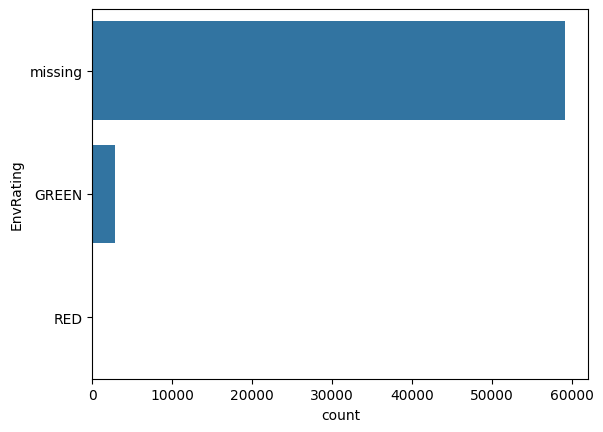

In [ ]:
sns.countplot(train.EnvRating)

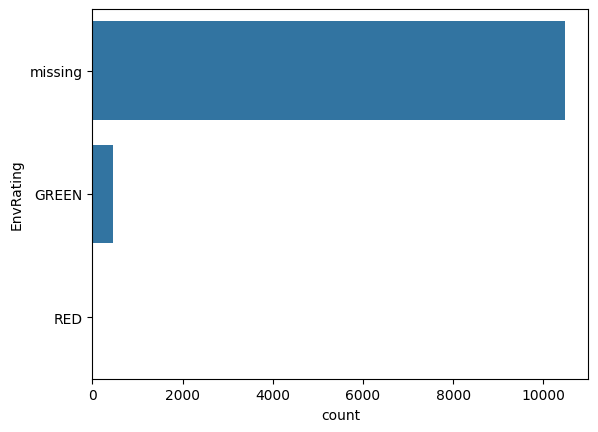

In [ ]:
sns.countplot(test.EnvRating);

In [ ]:
(train.EnvRating =='missing').sum()

59092

In [ ]:
(59092 *100 /62035)

95.25590392520351

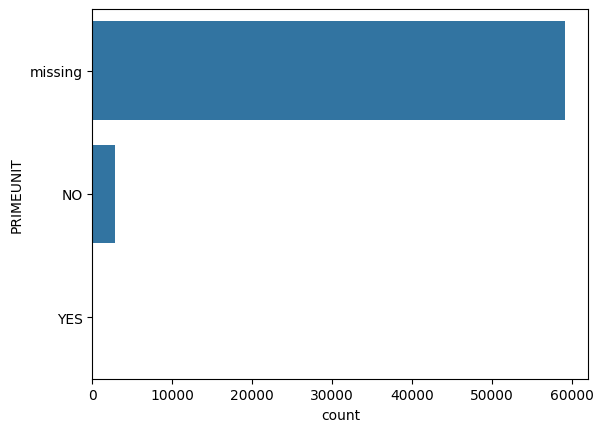

In [ ]:
sns.countplot(train.PRIMEUNIT);

From above it is clear that EnvRating and PRIMEUNIT HAS lot of missing values, so it would be better to drop them

In [ ]:
train.drop(columns=['EnvRating', 'PRIMEUNIT'], axis=1,inplace=True)
test.drop(columns=['EnvRating', 'PRIMEUNIT'], axis=1,inplace=True)

In [ ]:
train.columns

Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'Region', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2'],
      dtype='object')

In [ ]:
train.PriceIndex1.unique()

array(['9217.0', '2958.0', '4568.0', ..., '12310.0', '11347.0', '2132.0'],
      dtype=object)

In [ ]:
train['PriceIndex1'].astype('float')

ValueError: could not convert string to float: 'missing'

this indicates priceindexes although they are numeric they have been assigned object data type because they contain the word 'missing' in them. so 1st will have to replace the word missing with NAN and than impute them

In [ ]:
train['ExpeditedListing'].value_counts()

ExpeditedListing
0    60504
1     1531
Name: count, dtype: int64

from our below finding we come to know althoug represented as numeric dtype PropertyAge is a categorical but since its already ordinal encoded we wont dummy encode it. as by doing so the acuracy drops minisucially.



In [ ]:
train.PropertyAge.value_counts()

PropertyAge
4    14498
3    13508
5    11047
2     7211
6     6798
7     3919
1     2650
8     1870
9      532
0        2
Name: count, dtype: int64

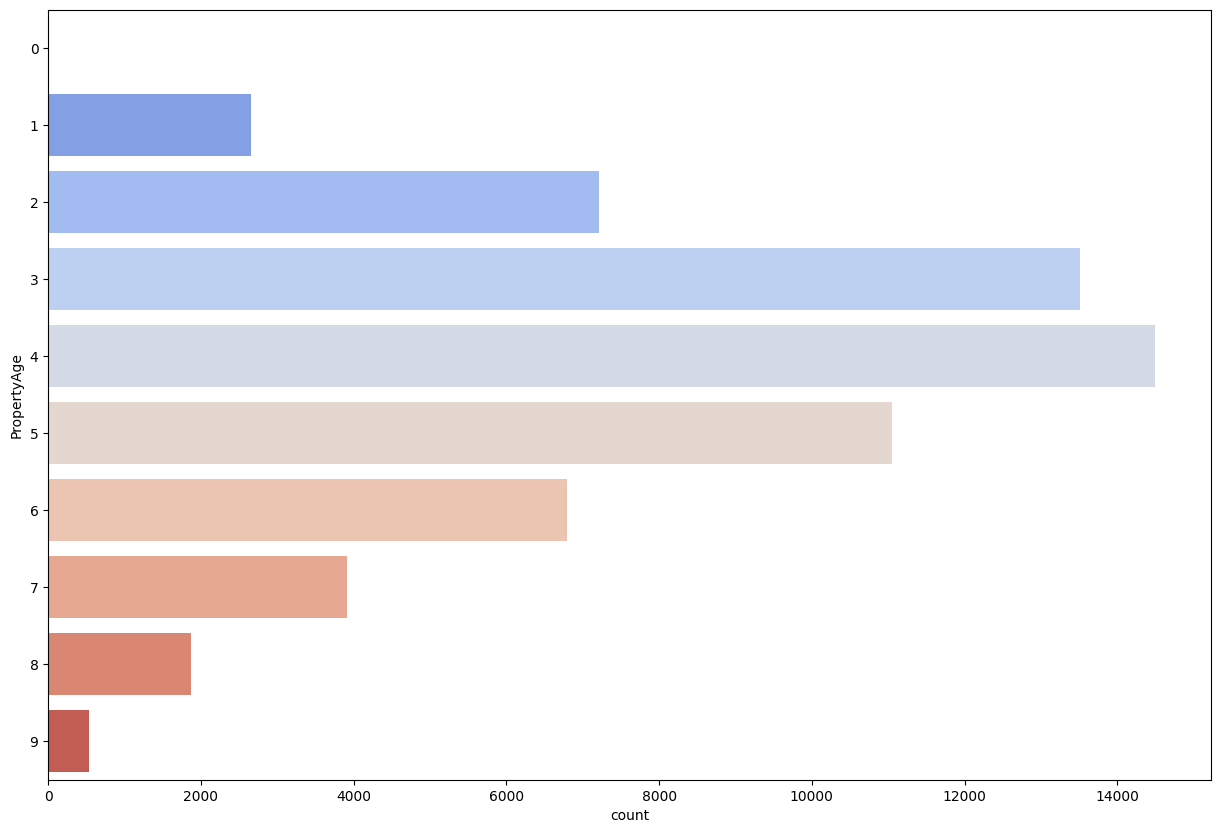

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'PropertyAge', data = train, palette='coolwarm' );

<Axes: xlabel='Agency', ylabel='count'>

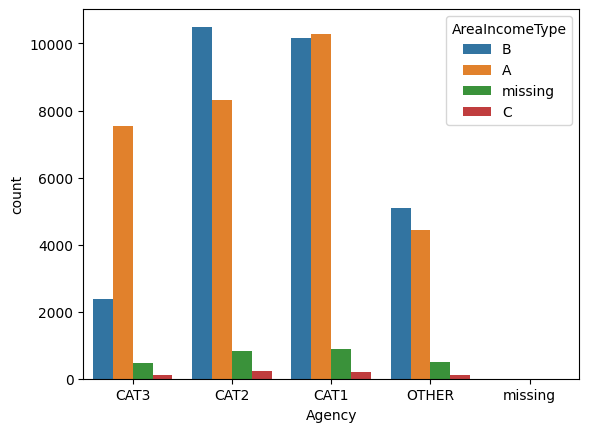

In [ ]:

import seaborn as sns
sns.countplot(x='Agency', hue='AreaIncomeType', data=train)

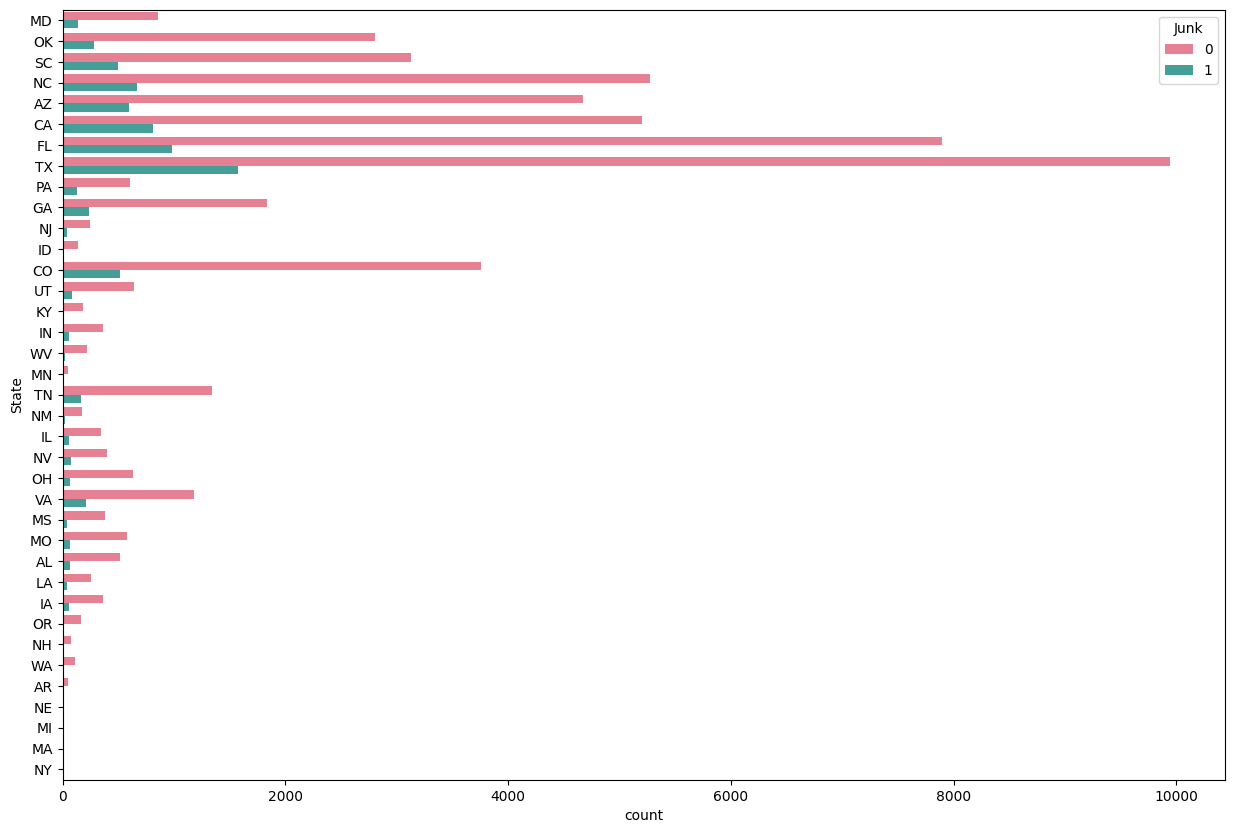

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'State', hue = 'Junk', data = train, palette='husl' );

only few states contribute more to the dataset so we will create dummies for it with frequency cutoff.

#### creating a temporary dataframe for all PriceIndexes to visualize their correlation.

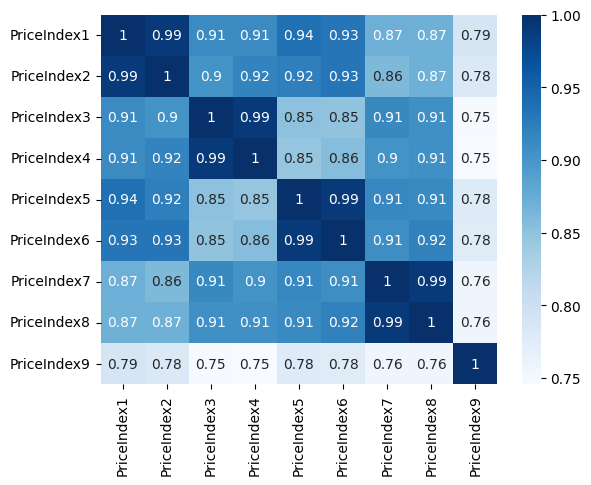

In [ ]:

train_temp =pd.DataFrame({
     'PriceIndex1': train['PriceIndex1'],
     'PriceIndex2' : train['PriceIndex2'],
     'PriceIndex3' :train['PriceIndex3'],
     'PriceIndex4' : train['PriceIndex4'],
     'PriceIndex5' : train['PriceIndex5'],
     'PriceIndex6' :train['PriceIndex6'],
    'PriceIndex7': train['PriceIndex7'],
     'PriceIndex8': train['PriceIndex8'],
     'PriceIndex9': train['PriceIndex9']

 })

# Replace 'Missing' with NaN for each PriceIndex column
for col in train_temp.columns:
    train_temp[col] = np.where(train_temp[col] == 'missing', np.nan, train_temp[col]).astype(float)


# Select columns that start with 'Price'
price_columns = [i for i in train_temp.columns]

# Calculate the correlation matrix
correlation_matrix = train_temp[price_columns].corr(numeric_only=True)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)
plt.show();

In [ ]:
train_temp.PriceIndex1.var()

6066959.202013261

In [ ]:
train_temp.PriceIndex8.max() - train_temp.PriceIndex8.min()

41062.0

From above its clearly understood that **PriceIndexes are highly correlated** to eachother. so we will **use PCA** to to handle highly correlated features by reducing dimensionality while retaining most of the variance in the data.

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

## Creating our custom functions

#### class for selecting the features/ columns

In [ ]:
class VarSelector(BaseEstimator, TransformerMixin):  # inherit the modules, same sequence standard practice /norm
    def __init__(self, feature_names):
       self.feature_names = feature_names   # global - written using self, so it is available inside that class

    # fit n trnsform are part of sklearn we r overwriting it with our own code
    def fit(self,x,y=None):  # fit method implements a logic on data, learns from the data
        return self

    def transform(self,X): # whatever it has learnt from the fit it 'apply' on that data
        return X[self.feature_names]  # getting the feature names as it is

    def get_feature_names(self):  # give the feature/ column names to be written
        return self.feature_names
    def get_feature_names_out(self, feature_names_out): # taking the input of what feature names need to be given out
        return self.feature_names


#### class for converting to numeric datatype and imputing datafame

In [ ]:
class convert_to_numeric(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names =[]   #.............. to avoid error make it empty list even if not used

    def fit(self,x,y=None):
        self.feature_names =x.columns
        return self

    def transform(self,X):
        for col in X.columns:
            X[col]=pd.to_numeric(X[col], errors='coerce')
        return X

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names


class DataFrameImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.impute_dict= {}
        self.feature_names =[]

    def fit(self,X,y=None):  # expecting df as an input (X)
        self.feature_names =X.columns  #
        for col in X.columns:
            if X[col].dtype=='O':
                self.impute_dict[col] ='missing'
            else:
                self.impute_dict[col] = X[col].median()
        return self

    def transform(self,X,y=None):
        return X.fillna(self.impute_dict)

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names

#### class for creating dummies with frequency cuttoff

In [ ]:
class get_dummies_cutoff(BaseEstimator, TransformerMixin):
    def __init__(self, freq_cutoff=0):
        self.freq_cutoff =freq_cutoff
        self.var_cat_dict ={}
        self.feature_names =[]

    def fit(self, x,y=None):
        #Given a dataset x, the fit method computes the categories for each feature
        #based on their frequency.
        data_cols = x.columns
        for col in data_cols:
            k =x[col].value_counts()
            if(k<= self.freq_cutoff).sum() ==0:
                cats =k.index[:-1]
            else:
                cats =k.index[k >self.freq_cutoff]
            self.var_cat_dict[col] =cats

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                self.feature_names.append(col+ '_' + str(cat))
        return self

    def transform(self,x,y=None):
        # The transform method creates dummy variables for each category in the dataset.
        dummy_data =x.copy()

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name =col+ '_'+ str(cat)
                dummy_data[name] = (dummy_data[col] == cat).astype(int) # Compare with the actual category
                # (dummy_data[col] == str(cat)) --- error

            # The issue is that the condition (dummy_data[col] == str(cat)) is always evaluating to False, resulting in all zeros.
            #This happens because the original values in dummy_data[col] are not equal to the string representation of the category (str(cat)).
            del dummy_data[col] #removes the original categorical feature from the dataset
        return dummy_data

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names

        # fit method
#If the frequency of a category is less than or equal to the freq_cutoff,
#it includes all categories except the last one (since it’s not below the threshold)
# Otherwise, it includes only the categories with frequency greater than
# the freq_cutoff
# The resulting categories are stored in var_cat_dict

#### class for making pipleines

In [ ]:
class pdPipeline(Pipeline):
    def get_feature_names(self):
        last_step = self.steps[-1][-1]
        return last_step.get_feature_names()

#### class for replacing the word missing with NAN

In [ ]:

class MissingToNATransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names =[]

    def fit(self, X, y=None):
        self.feature_names = X.columns.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = X[col].replace('Missing', pd.NA)
        return X

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names


#### class for converting to datetime and extracting its components

In [ ]:
class DateTimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []

    def fit(self, X, y=None):
        # Generate feature names based on the input columns
        for col in X.columns:
            self.feature_names.extend([f"{col}_year", f"{col}_month"])
        return self

    def transform(self, X):
        Y = X.copy()
        for col in Y.columns:
            Y[col] = pd.to_datetime(Y[col])
            Y[col + '_year'] = Y[col].dt.year
            Y[col + '_month'] = Y[col].dt.month
        return Y.drop(columns=X.columns)

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, input_features=None):
        return self.feature_names

since target varible has value 1 too less than value 0 its an imbalanced data so we will use (specify) stratify in our train test split

In [ ]:
train.Junk.value_counts()

Junk
0    54433
1     7602
Name: count, dtype: int64

In [ ]:
X = train.drop(['Junk'],axis=1)
y= train.Junk

### Splitting the data using Stratify as dataset is Imbalanced.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X,y,stratify=y, test_size=0.2,
                                                 random_state=42)

In [ ]:
X_train.index ==y_train.index

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
train.columns

Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'Region', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2'],
      dtype='object')

In [ ]:
price_columns = [i for i in train.columns if i.startswith('Price')]

In [ ]:
cat_vars =['InteriorsStyle','Material','Agency','AreaIncomeType',
           'ExpeditedListing','Channel','Zip','PlotType',
           'Architecture','Region','SubModel','Facade','State']

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
p1= pdPipeline([
    ('cat_var', VarSelector(cat_vars)),
    ('dummies',get_dummies_cutoff(1000))
])

p2 =pdPipeline([
    ('var_select', VarSelector(price_columns)),
    ('missing word to numeric', MissingToNATransformer()),
    ('to_numeric', convert_to_numeric()),
    ('impute', DataFrameImputer()),
     ('pca', PCA(n_components=2)),
    ])

p3 =pdPipeline([
    ('var_select', VarSelector(['ListDate'])),
    ('to_date', DateTimeTransformer())
])

p4 =pdPipeline([
    ('var_select', VarSelector(['InsurancePremiumIndex','NormalisedPopulation','PropertyAge']))
])

In [ ]:
test.BuildYear.dtype

dtype('int64')

In [ ]:
test.BuildYear.unique()

array([2006, 2004, 2008, 2005, 2003, 2007, 2001, 2009, 2002])

In [ ]:
test.drop('BuildYear', axis=1, inplace=True)
# dropping it because using PropertyAge and ListDate's build year gives related information to BuildYear.

In [ ]:
data_pipe = FeatureUnion([
    ('p1',p1),
    ('p2',p2),
    ('p3',p3),
    ('p4',p4)
])

In [ ]:
dp_fit = data_pipe.fit(X_train)
dp_fit

FeatureUnion(transformer_list=[('p1',
                                pdPipeline(steps=[('cat_var',
                                                   VarSelector(feature_names=['InteriorsStyle',
                                                                              'Material',
                                                                              'Agency',
                                                                              'AreaIncomeType',
                                                                              'ExpeditedListing',
                                                                              'Channel',
                                                                              'Zip',
                                                                              'PlotType',
                                                                              'Architecture',
                                                                              'Region',
                                                                              'SubModel',
                                                                              'Facade',
                                                                              'State'])),
                                                  ('dummies',
                                                   get_dummies_cutoff(freq_cutoff=1000))])),
                               ('p2',
                                pdPipeline(steps=[('var_select',
                                                   VarSelector(...
                                                   MissingToNATransformer()),
                                                  ('to_numeric',
                                                   convert_to_numeric()),
                                                  ('impute',
                                                   DataFrameImputer()),
                                                  ('pca',
                                                   PCA(n_components=2))])),
                               ('p3',
                                pdPipeline(steps=[('var_select',
                                                   VarSelector(feature_names=['ListDate'])),
                                                  ('to_date',
                                                   DateTimeTransformer())])),
                               ('p4',
                                pdPipeline(steps=[('var_select',
                                                   VarSelector(feature_names=['InsurancePremiumIndex',
                                                                              'NormalisedPopulation',
                                                                              'PropertyAge']))]))])

In [ ]:
X_train_train =pd.DataFrame(data=dp_fit.transform(X_train), columns=dp_fit.get_feature_names_out())
X_train_train.head()

,p1__InteriorsStyle_K3BB,p1__InteriorsStyle_RCQE,p1__Material_PRN0,p1__Material_C8A4,p1__Material_ZCI3,p1__Material_NYFD,p1__Material_X7IX,p1__Material_IKAF,p1__Material_HE5A,p1__Material_4ZHP,p1__Material_RRJQ,p1__Agency_CAT1,p1__Agency_CAT2,p1__Agency_CAT3,p1__Agency_OTHER,p1__AreaIncomeType_A,p1__AreaIncomeType_B,p1__AreaIncomeType_missing,p1__ExpeditedListing_0,p1__Channel_Direct,p1__Channel_Other,p1__Zip_32824,p1__Zip_27542,p1__Zip_75236,p1__Zip_74135,p1__Zip_80022,p1__Zip_85226,p1__Zip_29697,p1__Zip_95673,p1__Zip_85040,p1__Zip_28273,p1__Zip_33619,p1__Zip_75050,p1__Zip_29532,p1__Zip_76040,p1__PlotType_WHBI,p1__PlotType_W62B,p1__PlotType_32T2,p1__PlotType_DIJX,p1__PlotType_WLQ6,p1__PlotType_DSSM,p1__PlotType_DJOP,p1__PlotType_7RBQ,p1__PlotType_I00H,p1__PlotType_V5R0,p1__Architecture_YIK5,p1__Architecture_TP7R,p1__Architecture_I3Z9,p1__Architecture_AVYP,p1__Architecture_1M5X,p1__Architecture_4GZ4,p1__Architecture_7IYX,p1__Architecture_RZOR,p1__Architecture_8SPA,p1__Architecture_K92H,p1__Region_A,p1__Region_B,p1__SubModel_FIVQ,p1__SubModel_KT8F,p1__SubModel_UA42,p1__SubModel_8YTZ,p1__Facade_SILVER,p1__Facade_WHITE,p1__Facade_BLUE,p1__Facade_GREY,p1__Facade_BLACK,p1__Facade_RED,p1__Facade_GOLD,p1__Facade_GREEN,p1__Facade_MAROON,p1__Facade_BEIGE,p1__State_TX,p1__State_FL,p1__State_NC,p1__State_CA,p1__State_AZ,p1__State_CO,p1__State_SC,p1__State_OK,p1__State_GA,p1__State_TN,p1__State_VA,p2__pca0,p2__pca1,p3__ListDate_year,p3__ListDate_month,p4__InsurancePremiumIndex,p4__NormalisedPopulation,p4__PropertyAge
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12454.463657,1816.281703,2010.0,9.0,923.0,60840.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-6501.787783,-832.982395,2009.0,1.0,1455.0,75418.0,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7234.614267,-207.545051,2009.0,9.0,671.0,52489.0,4.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14892.563635,106.231874,2010.0,8.0,1389.0,74284.0,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3715.485076,506.994942,2010.0,3.0,1974.0,75571.0,4.0


In [ ]:
X_test_test =pd.DataFrame(data=dp_fit.transform(X_test),
                          columns= dp_fit.get_feature_names_out())
X_test_test.head()

,p1__InteriorsStyle_K3BB,p1__InteriorsStyle_RCQE,p1__Material_PRN0,p1__Material_C8A4,p1__Material_ZCI3,p1__Material_NYFD,p1__Material_X7IX,p1__Material_IKAF,p1__Material_HE5A,p1__Material_4ZHP,p1__Material_RRJQ,p1__Agency_CAT1,p1__Agency_CAT2,p1__Agency_CAT3,p1__Agency_OTHER,p1__AreaIncomeType_A,p1__AreaIncomeType_B,p1__AreaIncomeType_missing,p1__ExpeditedListing_0,p1__Channel_Direct,p1__Channel_Other,p1__Zip_32824,p1__Zip_27542,p1__Zip_75236,p1__Zip_74135,p1__Zip_80022,p1__Zip_85226,p1__Zip_29697,p1__Zip_95673,p1__Zip_85040,p1__Zip_28273,p1__Zip_33619,p1__Zip_75050,p1__Zip_29532,p1__Zip_76040,p1__PlotType_WHBI,p1__PlotType_W62B,p1__PlotType_32T2,p1__PlotType_DIJX,p1__PlotType_WLQ6,p1__PlotType_DSSM,p1__PlotType_DJOP,p1__PlotType_7RBQ,p1__PlotType_I00H,p1__PlotType_V5R0,p1__Architecture_YIK5,p1__Architecture_TP7R,p1__Architecture_I3Z9,p1__Architecture_AVYP,p1__Architecture_1M5X,p1__Architecture_4GZ4,p1__Architecture_7IYX,p1__Architecture_RZOR,p1__Architecture_8SPA,p1__Architecture_K92H,p1__Region_A,p1__Region_B,p1__SubModel_FIVQ,p1__SubModel_KT8F,p1__SubModel_UA42,p1__SubModel_8YTZ,p1__Facade_SILVER,p1__Facade_WHITE,p1__Facade_BLUE,p1__Facade_GREY,p1__Facade_BLACK,p1__Facade_RED,p1__Facade_GOLD,p1__Facade_GREEN,p1__Facade_MAROON,p1__Facade_BEIGE,p1__State_TX,p1__State_FL,p1__State_NC,p1__State_CA,p1__State_AZ,p1__State_CO,p1__State_SC,p1__State_OK,p1__State_GA,p1__State_TN,p1__State_VA,p2__pca0,p2__pca1,p3__ListDate_year,p3__ListDate_month,p4__InsurancePremiumIndex,p4__NormalisedPopulation,p4__PropertyAge
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5044.030960,1745.875076,2010.0,9.0,1389.0,76762.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7813.718164,472.507226,2010.0,12.0,1251.0,56623.0,5.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.796148,-1029.792555,2009.0,2.0,1974.0,77105.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7454.850232,68.645519,2010.0,11.0,1215.0,63611.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2345.307848,272.839039,2010.0,12.0,569.0,70095.0,3.0


In [ ]:
X_test_final = pd.DataFrame(data=dp_fit.transform(test),
                            columns= dp_fit.get_feature_names_out())
X_test_final.head()

,p1__InteriorsStyle_K3BB,p1__InteriorsStyle_RCQE,p1__Material_PRN0,p1__Material_C8A4,p1__Material_ZCI3,p1__Material_NYFD,p1__Material_X7IX,p1__Material_IKAF,p1__Material_HE5A,p1__Material_4ZHP,p1__Material_RRJQ,p1__Agency_CAT1,p1__Agency_CAT2,p1__Agency_CAT3,p1__Agency_OTHER,p1__AreaIncomeType_A,p1__AreaIncomeType_B,p1__AreaIncomeType_missing,p1__ExpeditedListing_0,p1__Channel_Direct,p1__Channel_Other,p1__Zip_32824,p1__Zip_27542,p1__Zip_75236,p1__Zip_74135,p1__Zip_80022,p1__Zip_85226,p1__Zip_29697,p1__Zip_95673,p1__Zip_85040,p1__Zip_28273,p1__Zip_33619,p1__Zip_75050,p1__Zip_29532,p1__Zip_76040,p1__PlotType_WHBI,p1__PlotType_W62B,p1__PlotType_32T2,p1__PlotType_DIJX,p1__PlotType_WLQ6,p1__PlotType_DSSM,p1__PlotType_DJOP,p1__PlotType_7RBQ,p1__PlotType_I00H,p1__PlotType_V5R0,p1__Architecture_YIK5,p1__Architecture_TP7R,p1__Architecture_I3Z9,p1__Architecture_AVYP,p1__Architecture_1M5X,p1__Architecture_4GZ4,p1__Architecture_7IYX,p1__Architecture_RZOR,p1__Architecture_8SPA,p1__Architecture_K92H,p1__Region_A,p1__Region_B,p1__SubModel_FIVQ,p1__SubModel_KT8F,p1__SubModel_UA42,p1__SubModel_8YTZ,p1__Facade_SILVER,p1__Facade_WHITE,p1__Facade_BLUE,p1__Facade_GREY,p1__Facade_BLACK,p1__Facade_RED,p1__Facade_GOLD,p1__Facade_GREEN,p1__Facade_MAROON,p1__Facade_BEIGE,p1__State_TX,p1__State_FL,p1__State_NC,p1__State_CA,p1__State_AZ,p1__State_CO,p1__State_SC,p1__State_OK,p1__State_GA,p1__State_TN,p1__State_VA,p2__pca0,p2__pca1,p3__ListDate_year,p3__ListDate_month,p4__InsurancePremiumIndex,p4__NormalisedPopulation,p4__PropertyAge
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2694.175278,2677.158317,2010.0,9.0,728.0,67549.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1038.302706,2764.956601,2010.0,3.0,1334.0,56570.0,6.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-499.848069,-394.950795,2009.0,10.0,754.0,51840.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-3762.383636,178.174949,2010.0,5.0,1373.0,83300.0,5.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11112.188153,-439.311040,2009.0,1.0,2939.0,95035.0,6.0


In [ ]:
params ={'class_weight' : ['balanced',None],
               'penalty' : ['l1','l2'],
               'C' : [.0001, .0005,.001,.005,.01,.05,.1,1,2,5],
               'solver': ['liblinear']
               }

In [ ]:
lg =LogisticRegression()

In [ ]:
random_search = RandomizedSearchCV(lg ,cv=5,param_distributions=params,
                                   scoring='roc_auc',n_iter=20, verbose=20, n_jobs=-1)

In [ ]:
random_search.fit(X_train_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.0005, 0.001, 0.005,
                                              0.01, 0.05, 0.1, 1, 2, 5],
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   scoring='roc_auc', verbose=20)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print('Mean validation score:{0:.6f} (std: {1:.6f})'.format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))

            print('Parameters :{0}'.format(results['params'][candidate]))
            print("")

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:0.747648 (std: 0.009078)
Parameters :{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.05}

Model with rank: 2
Mean validation score:0.747562 (std: 0.008769)
Parameters :{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1}

Model with rank: 3
Mean validation score:0.746697 (std: 0.008889)
Parameters :{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 5}



In [ ]:
lg =LogisticRegression(**{'solver': 'liblinear', 'penalty': 'l1',
                          'class_weight': 'balanced', 'C': 0.05})
lg.fit(X_train_train,y_train)
y_pred =lg.predict_proba(X_test_test)[:,1]
y_pred

array([0.42272539, 0.38443838, 0.27220917, ..., 0.4303381 , 0.47280279,
       0.31739925])

### Evaluaing models performance using roc_auc_score<br>
The ROC AUC score is the area under the ROC curve.
It summarizes the classifier's performance across all possible classification thresholds.
The score ranges from 0 to 1:
0.5 indicates random guessing .
1 indicates perfect performance (ideal separation of positive and negative instances)


In [ ]:

roc_score = roc_auc_score(y_test, y_pred)

In [ ]:
roc_score

0.7547270283728057

## Sequential tunning of Xgboost parameters

In [ ]:
xgb_params ={

    "n_estimators":[100,200,500,700,800,1000],
    'learning_rate' :[0.0001,0.001,0.1,0.5,1,0.05]
}

In [ ]:
xgb1 =XGBClassifier(subsample=0.8,
                   colsample_bylevel=0.8,
                   colsample_bytree=0.8)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(xgb1 ,cv=5,param_distributions=xgb_params,
                                   scoring='roc_auc',n_iter=20, verbose=20, n_jobs=-1)

In [ ]:
random_search.fit(X_train_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=0.8,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=N...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.1,
                                                          0.5, 1, 0.05],
                                        'n_estimators': [100, 200, 500, 700,
                                                         800, 1000]},
                   scoring='roc_auc', verbose=20)

In [ ]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score:0.760564 (std: 0.007746)
Parameters :{'n_estimators': 200, 'learning_rate': 0.05}

Model with rank: 2
Mean validation score:0.760074 (std: 0.007242)
Parameters :{'n_estimators': 100, 'learning_rate': 0.05}

Model with rank: 3
Mean validation score:0.755037 (std: 0.007839)
Parameters :{'n_estimators': 1000, 'learning_rate': 0.001}



In classification tasks, a higher mean validation score generally indicates better model performance. So, we would aim to increase this score. The standard deviation (std) indicates the variability of the score across different validation folds; a lower std is preferable as it suggests more consistent performance.

In [ ]:
xgb_params ={"max_depth": [2,3,4,5,6,7,8,10]}

In [ ]:
xgb2 =XGBClassifier(n_estimators=200, learning_rate=0.05, subsample=0.8,
                   colsample_bylevel=0.8,
                   colsample_bytree=0.8)

In [ ]:
random_search=RandomizedSearchCV(xgb2,
                                 param_distributions=xgb_params,
                                 n_iter=20,
                                 cv=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 verbose=2)

In [ ]:
random_search.fit(X_train_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=0.8,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10]},
                   scoring='roc_auc', verbose=2)

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:0.760728 (std: 0.006841)
Parameters :{'max_depth': 5}

Model with rank: 2
Mean validation score:0.760564 (std: 0.007746)
Parameters :{'max_depth': 6}

Model with rank: 3
Mean validation score:0.759381 (std: 0.007128)
Parameters :{'max_depth': 7}



In [ ]:
xgb_params={
            'scale_pos_weight':[1,2,3,4]
            }

In [ ]:
xgb3 =XGBClassifier(n_estimators=200, learning_rate=0.05, subsample=0.8,
                   colsample_bylevel=0.8,
                   colsample_bytree=0.8,max_depth= 5)

In [ ]:
random_search=RandomizedSearchCV(xgb3,
                                 param_distributions=xgb_params,
                                 n_iter=20,
                                 cv=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 verbose=2)

In [ ]:
random_search.fit(X_train_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=0.8,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0...e,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=5,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'scale_pos_weight': [1, 2, 3, 4]},
                   scoring='roc_auc', verbose=2)

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:0.760905 (std: 0.006662)
Parameters :{'scale_pos_weight': 2}

Model with rank: 2
Mean validation score:0.760728 (std: 0.006841)
Parameters :{'scale_pos_weight': 1}

Model with rank: 3
Mean validation score:0.759592 (std: 0.007389)
Parameters :{'scale_pos_weight': 3}



In [ ]:
xgb_params={
            'subsample':[i/10 for i in range(5,11)],
            'colsample_bytree':[i/10 for i in range(5,11)],
            'colsample_bylevel':[i/10 for i in range(5,11)]
            }

In [ ]:
xgb4 =XGBClassifier(n_estimators=200, learning_rate=0.05,
                     scale_pos_weight=2,
                   max_depth= 5)

In [ ]:
random_search=RandomizedSearchCV(xgb4,
                                 param_distributions=xgb_params,
                                 n_iter=20,
                                 cv=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 verbose=2)

In [ ]:
random_search.fit(X_train_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9, 1.0],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='roc_auc', verbose=2)

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:0.761338 (std: 0.007026)
Parameters :{'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5}

Model with rank: 2
Mean validation score:0.760997 (std: 0.006900)
Parameters :{'subsample': 0.5, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score:0.760937 (std: 0.007023)
Parameters :{'subsample': 0.7, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.6}



In [ ]:
xgb5 =XGBClassifier(n_estimators=200, learning_rate=0.05,
                     scale_pos_weight=2, subsample=0.7, colsample_bytree=0.9,
                   max_depth= 5, colsample_bylevel=0.5)

In [ ]:
xgb_params={
            'reg_lambda':[i/10 for i in range(0,50)],
            'reg_alpha':[i/10 for i in range(0,50)]
            }

In [ ]:
random_search=RandomizedSearchCV(xgb5,
                                 param_distributions=xgb_params,
                                 cv=5,
                                 n_iter=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 verbose=10)

In [ ]:
random_search.fit(X_train_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=0.5,
                                           colsample_bynode=None,
                                           colsample_bytree=0.9, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0...
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0, 1.1, 1.2, 1.3, 1.4,
                                                      1.5, 1.6, 1.7, 1.8, 1.9,
                                                      2.0, 2.1, 2.2, 2.3, 2.4,
                                                      2.5, 2.6, 2.7, 2.8, 2.9, ...],
                                        'reg_lambda': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                       0.5, 0.6, 0.7, 0.8, 0.9,
                                                       1.0, 1.1, 1.2, 1.3, 1.4,
                                                       1.5, 1.6, 1.7, 1.8, 1.9,
                                                       2.0, 2.1, 2.2, 2.3, 2.4,
                                                       2.5, 2.6, 2.7, 2.8, 2.9, ...]},
                   scoring='roc_auc', verbose=10)

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:0.761239 (std: 0.006574)
Parameters :{'reg_lambda': 2.2, 'reg_alpha': 3.0}

Model with rank: 2
Mean validation score:0.760970 (std: 0.006739)
Parameters :{'reg_lambda': 3.9, 'reg_alpha': 0.2}

Model with rank: 3
Mean validation score:0.760612 (std: 0.007024)
Parameters :{'reg_lambda': 3.6, 'reg_alpha': 3.5}



In [ ]:
xgb6 =XGBClassifier(n_estimators=200, learning_rate=0.05,
                     scale_pos_weight=2, subsample=0.7, colsample_bytree=0.9,
                   max_depth= 5, colsample_bylevel=0.5,
                    reg_lambda = 2.2, reg_alpha = 3.0)

In [ ]:
xgb6.fit(X_train_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred =xgb6.predict_proba(X_test_test)[:,1]
y_pred

array([0.1273549 , 0.09518745, 0.07989336, ..., 0.18159276, 0.2531    ,
       0.08118822], dtype=float32)

In [ ]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7670661653444716

### Plotting the roc_auc curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """ plot the roc curve based on probability"""
    fpr, tpr,thresholds =roc_curve(true_y, y_prob)
    plt.plot(fpr,tpr)
    plt.xlabel('False +ve rate')
    plt.ylabel('True +ve rate')
    score = roc_auc_score(true_y, y_prob)
    print(f"ROC AUC:{score :.4f}")

ROC AUC:0.7671


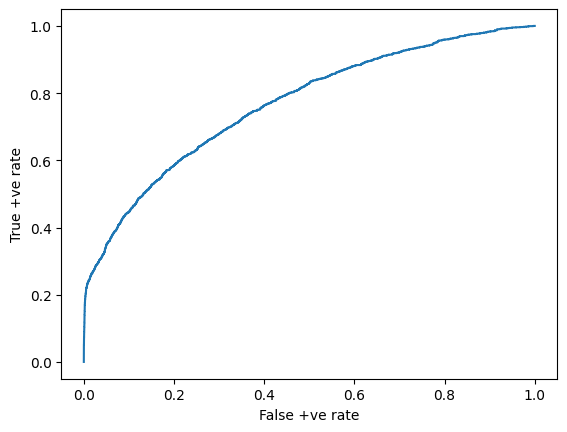

In [ ]:
plot_roc_curve(y_test, y_pred)

### Making predictions on the final test dataset and submitting the csv

In [ ]:
final_X_test = xgb6.predict_proba(X_test_final)[:,1]
final_X_test[:50]

array([0.10707676, 0.17103286, 0.02929975, 0.14136614, 0.39929026,
       0.27560958, 0.13215236, 0.1893875 , 0.63153327, 0.4710219 ,
       0.08920388, 0.08160059, 0.24747702, 0.11096929, 0.09925827,
       0.17194055, 0.12239102, 0.8267069 , 0.03477523, 0.2037765 ,
       0.14919297, 0.20797598, 0.07388658, 0.20303626, 0.3010106 ,
       0.09208038, 0.12342191, 0.10504267, 0.41157168, 0.18495642,
       0.16314588, 0.09539289, 0.11041854, 0.09065136, 0.14075564,
       0.21204226, 0.2105752 , 0.05489152, 0.10638116, 0.09471155,
       0.0640108 , 0.09517456, 0.22382317, 0.24809429, 0.13805912,
       0.0716834 , 0.07295214, 0.2163548 , 0.12299238, 0.22834234],
      dtype=float32)

In [ ]:
pd.DataFrame(final_X_test).to_csv('junk_property_listings_attempt1.csv', index=False)